In [158]:
import os 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

In [159]:
data = np.load("/home/c817h/Documents/logs/activelearning/mnist_ba_bald/2021-10-18_10-07-53-710289/stored.npz")
file = "stored.npz"
base_dir = "/home/c817h/Documents/logs/activelearning/mnist_ba_bald"

run_full = np.array( [0.9807, 0.9802, 0.9812, 0.9760, 0.9804 ])
max_acc = run_full.mean()
names = ['BALD', 'Entropy', 'Random']
base_dirs = [
    "/home/c817h/Documents/logs/activelearning/mnist_ba_bald",
    "/home/c817h/Documents/logs/activelearning/mnist_ba_entropy",
    "/home/c817h/Documents/logs/activelearning/mnist_ba_random"
]

In [160]:
df = []
for name, base_dir in zip(names, base_dirs):
    print(name)
    print(base_dir)
    out_dicts = []
    folders=os.listdir(base_dir)
    for folder in folders:
        path = os.path.join(base_dir, folder, file)
        if os.path.isfile(path):
            print(path)
            out_dicts.append(dict(np.load(path)))
    
    dataframe = []
    for i, out_dict in enumerate(out_dicts):
        for key in out_dict:
            pop_keys=[]
            if len(out_dict[key].shape) > 1:
                pop_keys.append(key)
        for key in pop_keys:
            out_dict.pop(key)
        df_temp = pd.DataFrame(out_dict)
        df_temp['run'] = i
        dataframe.append(df_temp)

    dataframe = pd.concat(dataframe)
    dataframe['Sampling'] = name
    df.append(dataframe)
df = pd.concat(df)
df.reset_index(inplace=True)

BALD
/home/c817h/Documents/logs/activelearning/mnist_ba_bald
/home/c817h/Documents/logs/activelearning/mnist_ba_bald/2021-10-18_10-07-53-710289/stored.npz
/home/c817h/Documents/logs/activelearning/mnist_ba_bald/2021-10-18_10-20-05-376796/stored.npz
/home/c817h/Documents/logs/activelearning/mnist_ba_bald/2021-10-18_10-51-41-533238/stored.npz
Entropy
/home/c817h/Documents/logs/activelearning/mnist_ba_entropy
/home/c817h/Documents/logs/activelearning/mnist_ba_entropy/2021-10-18_13-17-51-164354/stored.npz
/home/c817h/Documents/logs/activelearning/mnist_ba_entropy/2021-10-18_13-54-36-961950/stored.npz
/home/c817h/Documents/logs/activelearning/mnist_ba_entropy/2021-10-18_13-37-48-269073/stored.npz
Random
/home/c817h/Documents/logs/activelearning/mnist_ba_random
/home/c817h/Documents/logs/activelearning/mnist_ba_random/2021-10-18_11-05-21-291261/stored.npz
/home/c817h/Documents/logs/activelearning/mnist_ba_random/2021-10-18_12-02-21-263222/stored.npz
/home/c817h/Documents/logs/activelearning/

In [161]:
df

,index,val_acc,test_acc,num_samples,run,Sampling
0,0,0.837167,0.8378,100,0,BALD
1,1,0.891833,0.8973,200,0,BALD
2,2,0.950833,0.9521,300,0,BALD
3,3,0.945250,0.9409,400,0,BALD
4,4,0.956667,0.9558,500,0,BALD
...,...,...,...,...,...,...
95,5,0.937250,0.9415,600,3,Random
96,6,0.940750,0.9481,700,3,Random
97,7,0.940000,0.9446,800,3,Random
98,8,0.939667,0.9468,900,3,Random


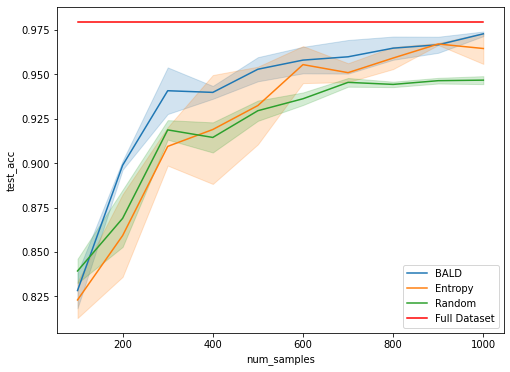

In [167]:
fig, ax = plt.subplots()
# plt.plot(num_samples, test_accs.mean(axis=1) ) #,y_err=test_accs.std(axis=1))
# plt.errorbar(num_samples, test_accs.mean(axis=1) , test_accs.std(axis=1), label='BALD')
sns.lineplot(ax=ax, data=df, y='test_acc',x='num_samples', hue='Sampling', ci="sd" )
ax.plot(data['num_samples'], [max_acc]*len(data['num_samples']), label='Full Dataset', color='r')
plt.legend()
# ax.set_ylim(0.92, 0.98)
fig.set_size_inches(8, 6)
plt.show()

In [134]:
folders

['2021-10-18_10-07-53-710289',
 '2021-10-18_10-20-05-376796',
 '2021-10-18_11-05-11-658043',
 '2021-10-18_10-51-41-533238']